Test File for hmm.GaussianHMM

This code is constructed using hmmlearn python package.

In [10]:
#Loading the required packages:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from hmmlearn import hmm

#setting.seed
np.random.seed(42)

In [11]:
# We'll simulate more realistic switching between states 0 and 1.
# For simplicity:
#   - State 0 = 'Bullish': loc=5, scale=1
#   - State 1 = 'Bearish': loc=-5, scale=2
# We'll create multiple segments of different lengths to total ~500.

segment_lengths = [30, 50, 60, 70, 80, 80, 130]  # sums to 500

# We'll alternate between state 0 and state 1.
# e.g. indices 0, 2, 4... -> state 0, indices 1, 3, 5... -> state 1

data_segments = []
ground_truth = []  # We'll store the known (true) state for each data point.
for i, length in enumerate(segment_lengths):
    if i % 2 == 0:
        # Even index -> state 0 (bullish)
        segment_data = np.random.normal(loc=0.5, scale=0.1, size=(length, 1))
        true_state = 0
    else:
        # Odd index -> state 1 (bearish)
        segment_data = np.random.normal(loc=-0.01, scale=0.2, size=(length, 1))
        true_state = 1
    data_segments.append(segment_data)
    # Extend ground_truth by 'length' elements, all set to the current true_state.
    ground_truth.extend([true_state] * length)


# Stack all the segments vertically
X = np.vstack(data_segments)

# Convert ground_truth to a numpy array
ground_truth = np.array(ground_truth)


In [12]:
# n_components=2: We'll assume exactly two hidden states.
# covariance_type='full': This assumes a full covariance matrix where all features can effect eachother.
# n_iter=100: Up to 100 EM iterations to optimize parameters.
#Now we define our model with out training. Literraly just define number of states, covariance matrix type and maximum number of ittereations for computaitonal simplicity.
model = hmm.GaussianHMM(
        n_components=2,
        covariance_type="diag",
        n_iter=100
)


In [13]:
#Fitting/training the model
# The fit method runs the EM algorithm:
#   - E-step: Compute posterior probabilities of each state given the data.
#   - M-step: Update state parameters (means, variances) and transition probabilities.
# This fits the model given the data simulated from gaussian distributions above.
model.fit(X)


GaussianHMM(n_components=2, n_iter=100)

In [14]:
#Inspecting the fitted model:

#Printing the estimated means for each state
print("Estimated means:", model.means_.ravel())

#Printing the estimated covariances (this is weird with one variable or is it relating to the number of states)
print("Estimated covariances:", model.covars_)

# Each row i shows the probability of transitioning from state i to the other states.
print("Transition matrix:\n", model.transmat_)

Estimated means: [ 0.49813092 -0.00176214]
Estimated covariances: [[[0.01087611]]

 [[0.02938129]]]
Transition matrix:
 [[0.98982337 0.01017663]
 [0.01531737 0.98468263]]


In [15]:
#Now we continue to predicting the hidden states given the transition matrix.
hidden_states = model.predict(X)
print("Hidden states first(20):",hidden_states[:20])

Hidden states first(20): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


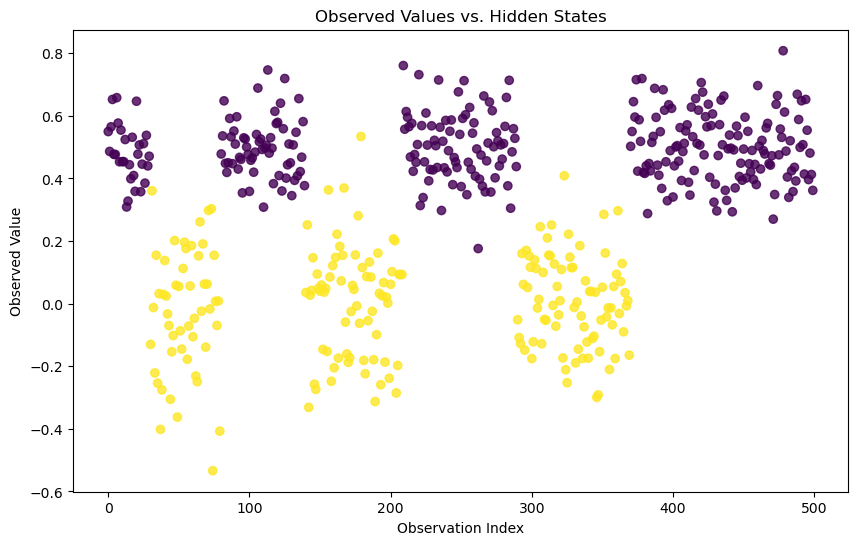

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(X)), X, c=hidden_states, cmap='viridis', alpha=0.8)
plt.title('Observed Values vs. Hidden States')
plt.xlabel('Observation Index')
plt.ylabel('Observed Value')
plt.show()

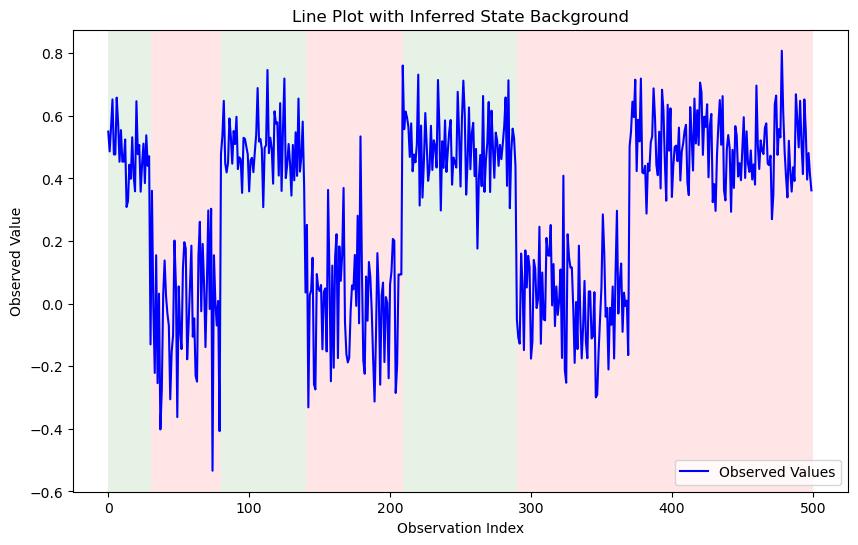

In [18]:
# 7b. Plot with a Colored Background

plt.figure(figsize=(10, 6))

# Plot the data as a line
plt.plot(range(len(X)), X, color="blue", label="Observed Values")

# We'll fill red for state 0, green for state 1, using contiguous segments
current_state = hidden_states[0]
segment_start = 0
for i in range(1, len(hidden_states)):
    if hidden_states[i] != current_state:
        # Fill region from segment_start to i
        if current_state == 0:
            plt.axvspan(segment_start, i, facecolor='green', alpha=0.1)
        else:
            plt.axvspan(segment_start, i, facecolor='red', alpha=0.1)
        segment_start = i
        current_state = hidden_states[i]

# Fill the last region
if current_state == 0:
    plt.axvspan(segment_start, len(hidden_states), facecolor='red', alpha=0.1)
else:
    plt.axvspan(segment_start, len(hidden_states), facecolor='green', alpha=0.1)

plt.title("Line Plot with Inferred State Background")
plt.xlabel("Observation Index")
plt.ylabel("Observed Value")
plt.legend()
plt.show()